メッシュマップ

In [155]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np

# set font
import matplotlib as mpl

# for Mac
mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
# mpl.rc('font',family='MS Gothic')

In [156]:
# 空間データなので geopandas (gpd) でインポート

niigatamesh1= gpd.read_file('data2/SDDSWS5537')
niigatamesh2= gpd.read_file('data2/SDDSWS5538')
niigatamesh3= gpd.read_file('data2/SDDSWS5539')
niigatamesh4= gpd.read_file('data2/SDDSWS5638')
niigatamesh5= gpd.read_file('data2/SDDSWS5639')
niigatamesh6= gpd.read_file('data2/SDDSWS5738')
niigatamesh7= gpd.read_file('data2/SDDSWS5739')

In [157]:
# combine all four mesh shapes
niigatamesh = gpd.pd.concat([niigatamesh1,niigatamesh2,niigatamesh3,niigatamesh4,niigatamesh5,niigatamesh6,niigatamesh7])

<Axes: >

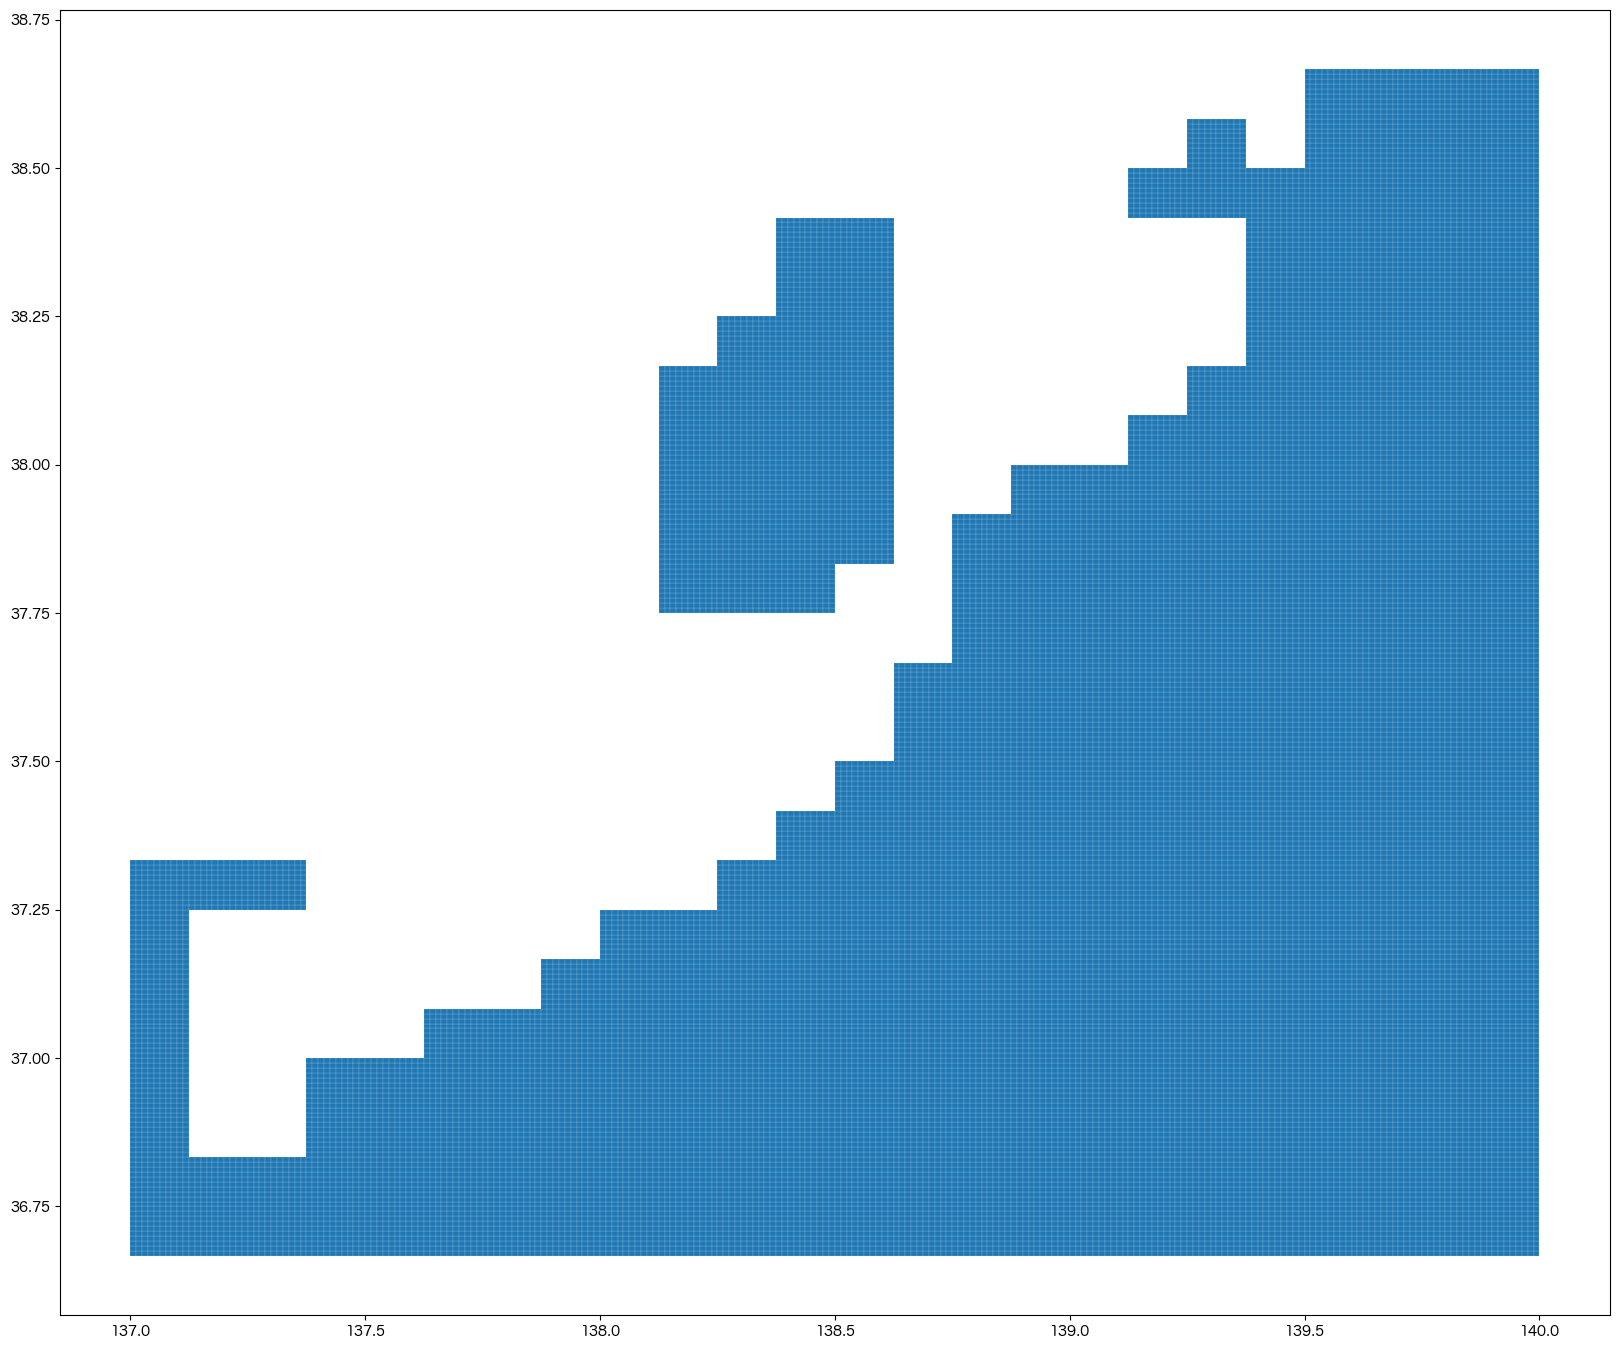

In [158]:
# quick plot
niigatamesh.plot(figsize=(20,20),edgecolor='white',linewidth=0.1)

In [159]:
niigatamesh.head()

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,OBJ_ID,geometry
0,55370000,5537,00,00,1,"POLYGON ((137.01250 36.66667, 137.00000 36.666..."
1,55370001,5537,00,01,2,"POLYGON ((137.02500 36.66667, 137.01250 36.666..."
2,55370002,5537,00,02,3,"POLYGON ((137.03750 36.66667, 137.02500 36.666..."
3,55370003,5537,00,03,4,"POLYGON ((137.05000 36.66667, 137.03750 36.666..."
4,55370004,5537,00,04,5,"POLYGON ((137.06250 36.66667, 137.05000 36.666..."


In [160]:
# csvデータなので pandas (pd) でインポート
# 文字化け予防のために encoding='cp932' 
niigatadata1 = pd.read_csv('data2/tblT001100S5537.txt', encoding='cp932')
niigatadata2 = pd.read_csv('data2/tblT001100S5538.txt', encoding='cp932')
niigatadata3 = pd.read_csv('data2/tblT001100S5539.txt', encoding='cp932')
niigatadata4 = pd.read_csv('data2/tblT001100S5638.txt', encoding='cp932')
niigatadata5 = pd.read_csv('data2/tblT001100S5639.txt', encoding='cp932')
niigatadata6 = pd.read_csv('data2/tblT001100S5738.txt', encoding='cp932')
niigatadata7 = pd.read_csv('data2/tblT001100S5739.txt', encoding='cp932')

データの修正

In [161]:
# check data
niigatadata1.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
0,NaN,NaN,NaN,NaN,人口（総数）,人口（総数） 男,人口（総数） 女,０～１４歳人口 総数,０～１４歳人口 男,０～１４歳人口 女,...,６人世帯数 一般世帯数,７人以上世帯数 一般世帯数,親族のみの世帯数 一般世帯数,核家族世帯数 一般世帯数,核家族以外の世帯数 一般世帯数,６歳未満世帯員のいる世帯数 一般世帯数,６５歳以上世帯員のいる世帯数 一般世帯数,世帯主の年齢が２０～２９歳の１人世帯数 一般世帯数,高齢単身世帯数 一般世帯数,高齢夫婦世帯数 一般世帯数
1,55370001.0,0.0,NaN,NaN,313,152,161,27,15,12,...,3,2,84,55,29,5,72,0,13,11
2,55370002.0,0.0,NaN,NaN,244,123,121,17,11,6,...,1,2,61,41,20,3,54,0,7,10
3,55370003.0,0.0,NaN,NaN,17,9,8,2,1,1,...,0,1,4,3,1,0,3,0,0,0
4,55370005.0,0.0,NaN,NaN,137,68,69,10,4,6,...,2,0,44,32,12,4,33,0,5,10


In [162]:
# ４つのテーブルから１行目を削除
niigatadata1=niigatadata1[1:]
niigatadata2=niigatadata2[1:]
niigatadata3=niigatadata3[1:]
niigatadata4=niigatadata4[1:]
niigatadata5=niigatadata5[1:]
niigatadata6=niigatadata6[1:]
niigatadata7=niigatadata7[1:]


In [163]:
# ４つのテーブルから「＊」を非数に置き換える
niigatadata1 = niigatadata1.replace('*',np.nan)
niigatadata2 = niigatadata2.replace('*',np.nan)
niigatadata3 = niigatadata3.replace('*',np.nan)
niigatadata4 = niigatadata4.replace('*',np.nan)
niigatadata5 = niigatadata5.replace('*',np.nan)
niigatadata6 = niigatadata6.replace('*',np.nan)
niigatadata7 = niigatadata7.replace('*',np.nan)


In [164]:
niigatadata1

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,55370001.0,0.0,NaN,NaN,313,152,161,27,15,12,...,3,2,84,55,29,5,72,0,13,11
2,55370002.0,0.0,NaN,NaN,244,123,121,17,11,6,...,1,2,61,41,20,3,54,0,7,10
3,55370003.0,0.0,NaN,NaN,17,9,8,2,1,1,...,0,1,4,3,1,0,3,0,0,0
4,55370005.0,0.0,NaN,NaN,137,68,69,10,4,6,...,2,0,44,32,12,4,33,0,5,10
5,55370006.0,0.0,NaN,NaN,19,10,9,1,1,0,...,1,0,6,5,1,0,3,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,55377198.0,0.0,NaN,NaN,48,25,23,1,0,1,...,0,0,15,14,1,0,14,0,3,4
1184,55377199.0,0.0,NaN,NaN,32,16,16,3,2,1,...,1,1,7,3,4,1,9,0,3,2
1185,55377280.0,0.0,NaN,NaN,88,39,49,5,2,3,...,1,0,27,22,5,2,33,1,11,7
1186,55377290.0,0.0,NaN,NaN,176,80,96,3,2,1,...,0,2,55,37,18,1,69,0,21,16


In [165]:
niigatadata = pd.concat([niigatadata1,niigatadata2,niigatadata3,niigatadata4,niigatadata5,niigatadata6,niigatadata7,])

In [166]:
niigatadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9608 entries, 1 to 737
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    9608 non-null   float64
 1   HTKSYORI    9608 non-null   float64
 2   HTKSAKI     1209 non-null   float64
 3   GASSAN      979 non-null    object 
 4   T001100001  9608 non-null   object 
 5   T001100002  9608 non-null   object 
 6   T001100003  9608 non-null   object 
 7   T001100004  8399 non-null   object 
 8   T001100005  8399 non-null   object 
 9   T001100006  8399 non-null   object 
 10  T001100007  8399 non-null   object 
 11  T001100008  8399 non-null   object 
 12  T001100009  8399 non-null   object 
 13  T001100010  8399 non-null   object 
 14  T001100011  8399 non-null   object 
 15  T001100012  8399 non-null   object 
 16  T001100013  8399 non-null   object 
 17  T001100014  8399 non-null   object 
 18  T001100015  8399 non-null   object 
 19  T001100016  8399 non-null   objec

In [167]:
# まずはカラムをアウトプット
niigatadata.columns

Index(['KEY_CODE', 'HTKSYORI', 'HTKSAKI', 'GASSAN', 'T001100001', 'T001100002',
       'T001100003', 'T001100004', 'T001100005', 'T001100006', 'T001100007',
       'T001100008', 'T001100009', 'T001100010', 'T001100011', 'T001100012',
       'T001100013', 'T001100014', 'T001100015', 'T001100016', 'T001100017',
       'T001100018', 'T001100019', 'T001100020', 'T001100021', 'T001100022',
       'T001100023', 'T001100024', 'T001100025', 'T001100026', 'T001100027',
       'T001100028', 'T001100029', 'T001100030', 'T001100031', 'T001100032',
       'T001100033', 'T001100034', 'T001100035', 'T001100036', 'T001100037',
       'T001100038', 'T001100039', 'T001100040', 'T001100041', 'T001100042',
       'T001100043', 'T001100044', 'T001100045', 'T001100046', 'T001100047',
       'T001100048', 'T001100049', 'T001100050'],
      dtype='object')

In [168]:
niigatadata[niigatadata.columns[4:]]

,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,T001100007,T001100008,T001100009,T001100010,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,313,152,161,27,15,12,286,137,149,172,...,3,2,84,55,29,5,72,0,13,11
2,244,123,121,17,11,6,223,111,112,144,...,1,2,61,41,20,3,54,0,7,10
3,17,9,8,2,1,1,15,8,7,11,...,0,1,4,3,1,0,3,0,0,0
4,137,68,69,10,4,6,127,64,63,75,...,2,0,44,32,12,4,33,0,5,10
5,19,10,9,1,1,0,18,9,9,13,...,1,0,6,5,1,0,3,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,3,1,2,3,2,1,13,6,7,9,...,0,1,4,2,2,1,3,0,0,0
734,70,31,39,3,1,2,67,30,37,35,...,0,2,19,9,10,0,21,0,3,4
735,14,8,6,0,0,0,14,8,6,4,...,0,0,4,3,1,0,6,0,2,0
736,7,4,3,0,0,0,11,5,6,6,...,0,0,3,2,1,0,4,0,2,0


In [169]:
# check data info
niigatadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9608 entries, 1 to 737
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    9608 non-null   float64
 1   HTKSYORI    9608 non-null   float64
 2   HTKSAKI     1209 non-null   float64
 3   GASSAN      979 non-null    object 
 4   T001100001  9608 non-null   object 
 5   T001100002  9608 non-null   object 
 6   T001100003  9608 non-null   object 
 7   T001100004  8399 non-null   object 
 8   T001100005  8399 non-null   object 
 9   T001100006  8399 non-null   object 
 10  T001100007  8399 non-null   object 
 11  T001100008  8399 non-null   object 
 12  T001100009  8399 non-null   object 
 13  T001100010  8399 non-null   object 
 14  T001100011  8399 non-null   object 
 15  T001100012  8399 non-null   object 
 16  T001100013  8399 non-null   object 
 17  T001100014  8399 non-null   object 
 18  T001100015  8399 non-null   object 
 19  T001100016  8399 non-null   objec

In [170]:
# 4番目以降をアウトプット
niigatadata.columns[4:]

Index(['T001100001', 'T001100002', 'T001100003', 'T001100004', 'T001100005',
       'T001100006', 'T001100007', 'T001100008', 'T001100009', 'T001100010',
       'T001100011', 'T001100012', 'T001100013', 'T001100014', 'T001100015',
       'T001100016', 'T001100017', 'T001100018', 'T001100019', 'T001100020',
       'T001100021', 'T001100022', 'T001100023', 'T001100024', 'T001100025',
       'T001100026', 'T001100027', 'T001100028', 'T001100029', 'T001100030',
       'T001100031', 'T001100032', 'T001100033', 'T001100034', 'T001100035',
       'T001100036', 'T001100037', 'T001100038', 'T001100039', 'T001100040',
       'T001100041', 'T001100042', 'T001100043', 'T001100044', 'T001100045',
       'T001100046', 'T001100047', 'T001100048', 'T001100049', 'T001100050'],
      dtype='object')

In [171]:
# objectからfloatに変換
niigatadata[niigatadata.columns[4:]].astype(float)

,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,T001100007,T001100008,T001100009,T001100010,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,313.0,152.0,161.0,27.0,15.0,12.0,286.0,137.0,149.0,172.0,...,3.0,2.0,84.0,55.0,29.0,5.0,72.0,0.0,13.0,11.0
2,244.0,123.0,121.0,17.0,11.0,6.0,223.0,111.0,112.0,144.0,...,1.0,2.0,61.0,41.0,20.0,3.0,54.0,0.0,7.0,10.0
3,17.0,9.0,8.0,2.0,1.0,1.0,15.0,8.0,7.0,11.0,...,0.0,1.0,4.0,3.0,1.0,0.0,3.0,0.0,0.0,0.0
4,137.0,68.0,69.0,10.0,4.0,6.0,127.0,64.0,63.0,75.0,...,2.0,0.0,44.0,32.0,12.0,4.0,33.0,0.0,5.0,10.0
5,19.0,10.0,9.0,1.0,1.0,0.0,18.0,9.0,9.0,13.0,...,1.0,0.0,6.0,5.0,1.0,0.0,3.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,3.0,1.0,2.0,3.0,2.0,1.0,13.0,6.0,7.0,9.0,...,0.0,1.0,4.0,2.0,2.0,1.0,3.0,0.0,0.0,0.0
734,70.0,31.0,39.0,3.0,1.0,2.0,67.0,30.0,37.0,35.0,...,0.0,2.0,19.0,9.0,10.0,0.0,21.0,0.0,3.0,4.0
735,14.0,8.0,6.0,0.0,0.0,0.0,14.0,8.0,6.0,4.0,...,0.0,0.0,4.0,3.0,1.0,0.0,6.0,0.0,2.0,0.0
736,7.0,4.0,3.0,0.0,0.0,0.0,11.0,5.0,6.0,6.0,...,0.0,0.0,3.0,2.0,1.0,0.0,4.0,0.0,2.0,0.0


In [172]:
# 元のデータを入れ替える
niigatadata[niigatadata.columns[4:]]=niigatadata[niigatadata.columns[4:]].astype(float)

In [173]:
# check!
niigatadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9608 entries, 1 to 737
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    9608 non-null   float64
 1   HTKSYORI    9608 non-null   float64
 2   HTKSAKI     1209 non-null   float64
 3   GASSAN      979 non-null    object 
 4   T001100001  9608 non-null   float64
 5   T001100002  9608 non-null   float64
 6   T001100003  9608 non-null   float64
 7   T001100004  8399 non-null   float64
 8   T001100005  8399 non-null   float64
 9   T001100006  8399 non-null   float64
 10  T001100007  8399 non-null   float64
 11  T001100008  8399 non-null   float64
 12  T001100009  8399 non-null   float64
 13  T001100010  8399 non-null   float64
 14  T001100011  8399 non-null   float64
 15  T001100012  8399 non-null   float64
 16  T001100013  8399 non-null   float64
 17  T001100014  8399 non-null   float64
 18  T001100015  8399 non-null   float64
 19  T001100016  8399 non-null   float

In [174]:
# KEY_CODEをfloatに
niigatamesh['KEY_CODE']=niigatamesh['KEY_CODE'].astype(float)

In [175]:
# merge the data
niigatamesh = niigatamesh.merge(niigatadata, on='KEY_CODE')

In [176]:
# check!
niigatamesh.sample(5)

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,OBJ_ID,geometry,HTKSYORI,HTKSAKI,GASSAN,T001100001,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
8614,56397577.0,5639,75,77,6178,"POLYGON ((139.72500 37.97500, 139.71250 37.975...",1.0,NaN,56397587,12.0,...,0.0,0.0,4.0,0.0,4.0,0.0,6.0,1.0,2.0,0.0
2270,55384224.0,5538,42,24,3425,"POLYGON ((138.31250 37.01667, 138.30000 37.016...",0.0,NaN,NaN,53.0,...,1.0,0.0,16.0,10.0,6.0,0.0,18.0,0.0,4.0,7.0
4504,55392794.0,5539,27,94,2395,"POLYGON ((139.93750 36.90833, 139.92500 36.908...",0.0,NaN,NaN,47.0,...,0.0,1.0,10.0,4.0,6.0,0.0,10.0,1.0,1.0,1.0
3212,55386403.0,5538,64,03,5204,"POLYGON ((138.55000 37.16667, 138.53750 37.166...",1.0,NaN,55386405;55386406,32.0,...,0.0,0.0,10.0,8.0,2.0,1.0,16.0,0.0,7.0,4.0
7789,56394668.0,5639,46,68,3869,"POLYGON ((139.86250 37.71667, 139.85000 37.716...",0.0,NaN,NaN,138.0,...,2.0,3.0,38.0,21.0,17.0,2.0,32.0,0.0,3.0,6.0


マップストーリーの作成

In [177]:
# reproject to 3857 (web mercator)
niigatamesh = niigatamesh.to_crs(3857)

<Axes: >

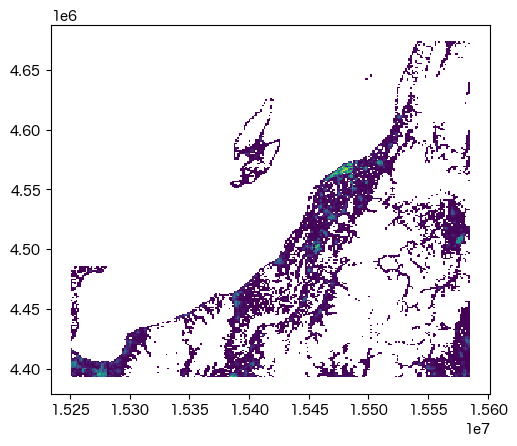

In [178]:
# make a quick plot
niigatamesh.plot(column='T001100001')

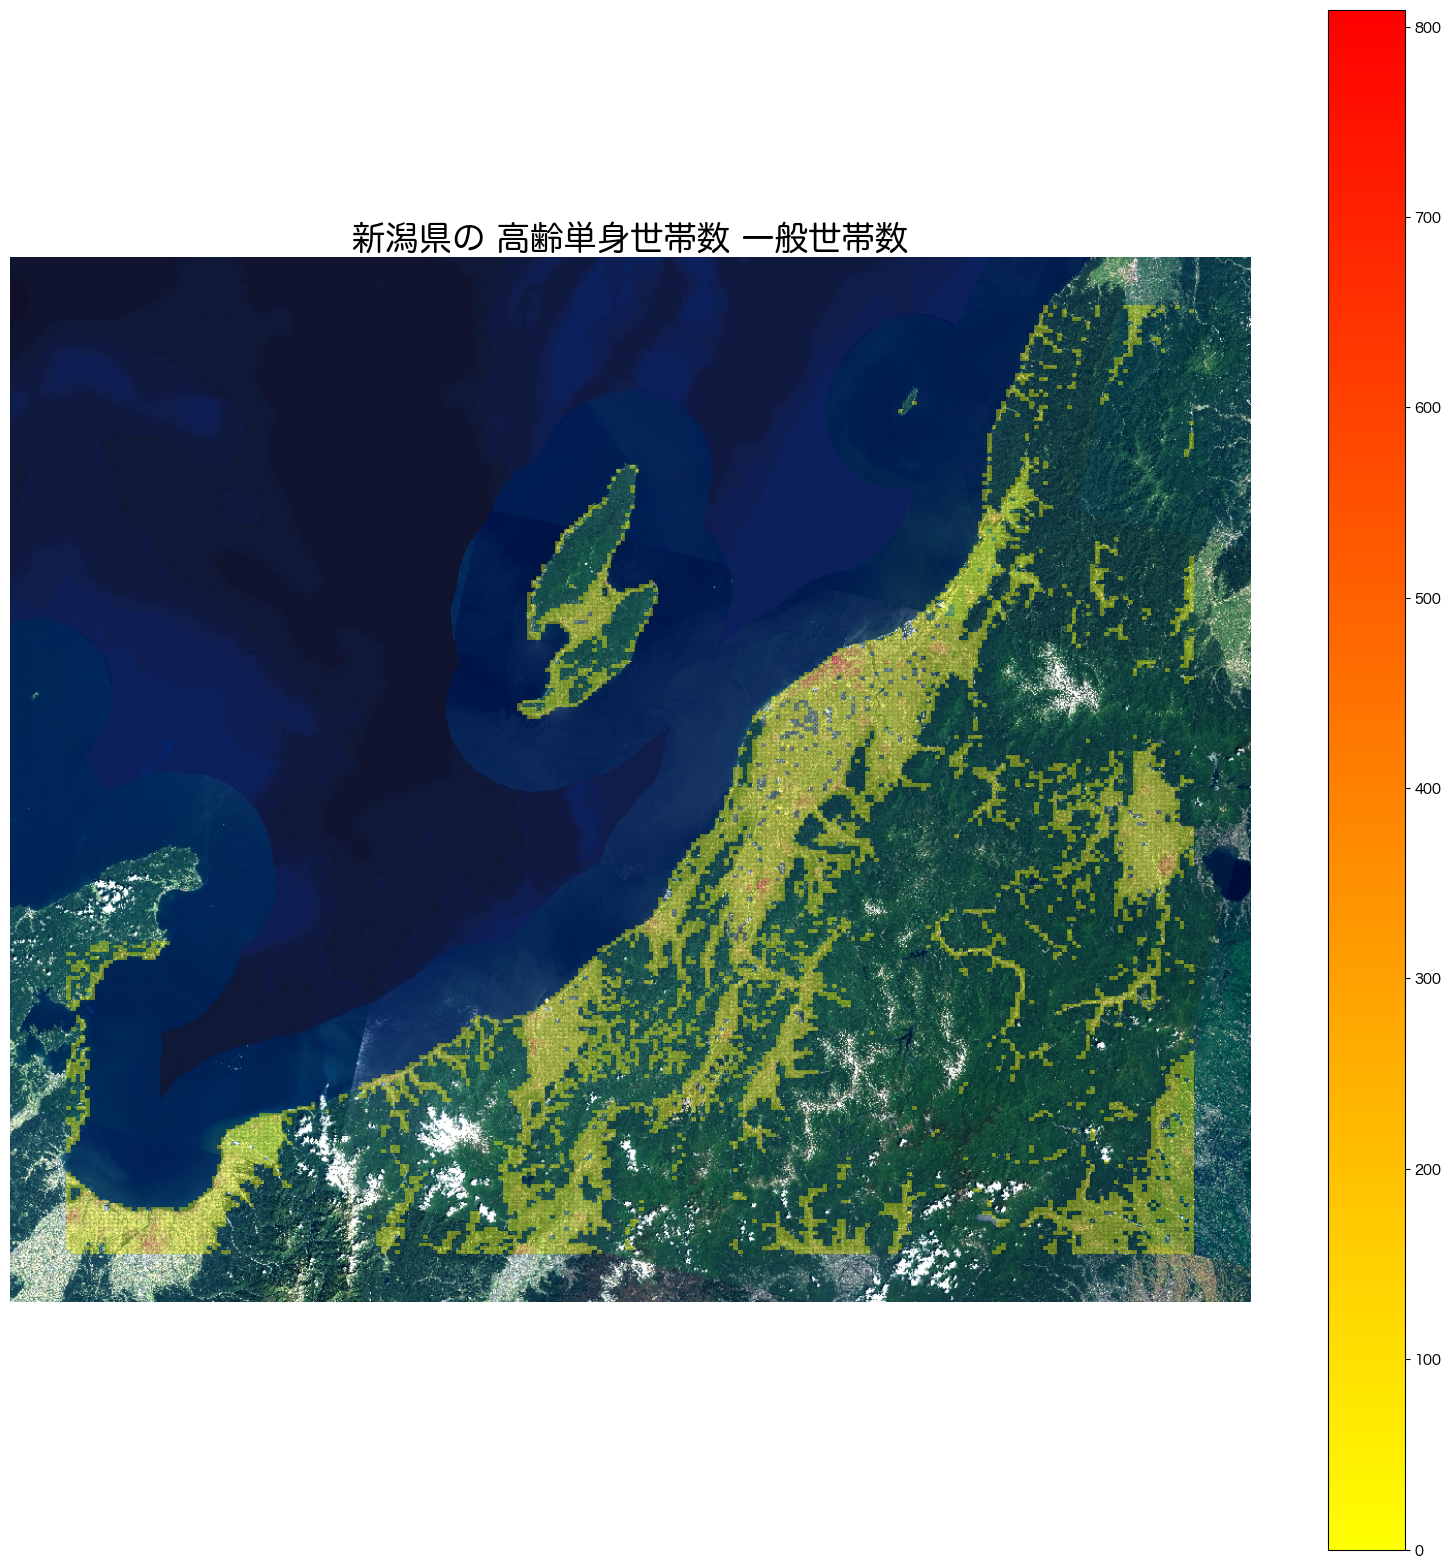

In [179]:
# population map
ax = niigatamesh.plot(figsize=(20,20),
         column='T001100049',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.4)

# hide axes
ax.axis('off')

# title
ax.set_title('新潟県の 高齢単身世帯数 一般世帯数',fontsize=24);

# add basemap
cx.add_basemap(ax,source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg')

番外編：法令上の農山村地域調査の資料を追加する

In [180]:
niigatasanson = pd.read_csv('data2/tblT001068C15.txt', encoding='cp932')

In [181]:
niigatasanson.head()

,KEY_CODE,PREF_N,CITY_N,KCITY_N,AGRI_N,T001068001,T001068002,T001068003,T001068004,T001068005,T001068006,T001068007,T001068008,T001068009,T001068010,T001068011,T001068012,T001068013,T001068014,T001068015
0,NaN,NaN,NaN,NaN,NaN,法制上の地域指定に該当している農業集落数_実農業集落数,法制上の地域指定に該当している農業集落数_都市計画区域_線引きあり_市街化区域,法制上の地域指定に該当している農業集落数_都市計画区域_線引きあり_市街化調整区域,法制上の地域指定に該当している農業集落数_都市計画区域_線引きなし,法制上の地域指定に該当している農業集落数_農業振興地域,法制上の地域指定に該当している農業集落数_農業振興地域_農用地区域,法制上の地域指定に該当している農業集落数_振興山村地域,法制上の地域指定に該当している農業集落数_豪雪地帯,法制上の地域指定に該当している農業集落数_豪雪地帯_特別豪雪地帯,法制上の地域指定に該当している農業集落数_離島振興対策実施地域,法制上の地域指定に該当している農業集落数_特定農山村地域,法制上の地域指定に該当している農業集落数_過疎地域,法制上の地域指定に該当している農業集落数_半島振興対策実施地域,法制上の地域指定に該当している農業集落数_特認地域,いずれの指定もない農業集落数
1,1.500000e+09,新潟県,NaN,NaN,NaN,5093,423,1310,2029,5002,4546,695,5093,2783,361,2132,2098,-,140,-
2,1.510100e+09,新潟県,北区,NaN,NaN,81,33,81,-,81,77,-,81,-,-,-,-,-,-,-
3,1.510101e+09,新潟県,北区,松ヶ崎浜村２－１,NaN,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,1.510101e+09,新潟県,北区,松ヶ崎浜村２－１,本村一,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


In [182]:
niigatasanson = niigatasanson[1:]

In [193]:
niigatasanson = niigatasanson.replace('-',np.nan)

In [194]:
niigatasanson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5739 entries, 1 to 5739
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    5739 non-null   float64
 1   PREF_N      5739 non-null   object 
 2   CITY_N      5738 non-null   object 
 3   KCITY_N     5665 non-null   object 
 4   AGRI_N      5242 non-null   object 
 5   T001068001  5586 non-null   object 
 6   T001068002  527 non-null    object 
 7   T001068003  1472 non-null   object 
 8   T001068004  2256 non-null   object 
 9   T001068005  5490 non-null   object 
 10  T001068006  5013 non-null   object 
 11  T001068007  775 non-null    object 
 12  T001068008  5586 non-null   object 
 13  T001068009  3053 non-null   object 
 14  T001068010  393 non-null    object 
 15  T001068011  2361 non-null   object 
 16  T001068012  2299 non-null   object 
 17  T001068013  0 non-null      float64
 18  T001068014  187 non-null    object 
 19  T001068015  0 non-null     

In [195]:
niigatasanson.columns

Index(['KEY_CODE', 'PREF_N', 'CITY_N', 'KCITY_N', 'AGRI_N', 'T001068001',
       'T001068002', 'T001068003', 'T001068004', 'T001068005', 'T001068006',
       'T001068007', 'T001068008', 'T001068009', 'T001068010', 'T001068011',
       'T001068012', 'T001068013', 'T001068014', 'T001068015'],
      dtype='object')

In [196]:
niigatasanson.columns[5:]

Index(['T001068001', 'T001068002', 'T001068003', 'T001068004', 'T001068005',
       'T001068006', 'T001068007', 'T001068008', 'T001068009', 'T001068010',
       'T001068011', 'T001068012', 'T001068013', 'T001068014', 'T001068015'],
      dtype='object')

In [197]:
niigatasanson

,KEY_CODE,PREF_N,CITY_N,KCITY_N,AGRI_N,T001068001,T001068002,T001068003,T001068004,T001068005,T001068006,T001068007,T001068008,T001068009,T001068010,T001068011,T001068012,T001068013,T001068014,T001068015
1,1.500000e+09,新潟県,NaN,NaN,NaN,5093,423,1310,2029,5002,4546,695,5093,2783,361,2132,2098,NaN,140,NaN
2,1.510100e+09,新潟県,北区,NaN,NaN,81,33,81,NaN,81,77,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.510101e+09,新潟県,北区,松ヶ崎浜村２－１,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.510101e+09,新潟県,北区,松ヶ崎浜村２－１,本村一,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.510101e+09,新潟県,北区,松ヶ崎浜村２－１,本村二,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5735,1.558102e+09,新潟県,関川村,女川村,湯沢,1,NaN,NaN,NaN,1,1,1,1,1,NaN,1,1,NaN,NaN,NaN
5736,1.558102e+09,新潟県,関川村,女川村,上野原,1,NaN,NaN,NaN,1,1,1,1,1,NaN,1,1,NaN,NaN,NaN
5737,1.558600e+09,新潟県,粟島浦村,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,2,2,NaN,NaN,NaN
5738,1.558600e+09,新潟県,粟島浦村,NaN,釜谷,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,1,1,NaN,NaN,NaN


In [204]:
# objectからfloatに変換
niigatasanson[niigatasanson.columns[5:]].astype(float)

,T001068001,T001068002,T001068003,T001068004,T001068005,T001068006,T001068007,T001068008,T001068009,T001068010,T001068011,T001068012,T001068013,T001068014,T001068015
1,5093.0,423.0,1310.0,2029.0,5002.0,4546.0,695.0,5093.0,2783.0,361.0,2132.0,2098.0,NaN,140.0,NaN
2,81.0,33.0,81.0,NaN,81.0,77.0,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5735,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN
5736,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN
5737,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN
5738,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN


In [199]:
#元のniigatadataにniigatasansonデータを追加（できてるのかな？）
niigatadata =niigatasanson[niigatasanson.columns[5:]].astype(float)

In [200]:
niigatadata

,T001068001,T001068002,T001068003,T001068004,T001068005,T001068006,T001068007,T001068008,T001068009,T001068010,T001068011,T001068012,T001068013,T001068014,T001068015
1,5093.0,423.0,1310.0,2029.0,5002.0,4546.0,695.0,5093.0,2783.0,361.0,2132.0,2098.0,NaN,140.0,NaN
2,81.0,33.0,81.0,NaN,81.0,77.0,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5735,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN
5736,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN
5737,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN
5738,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN


In [206]:
# KEY_CODEをfloatに
niigatamesh['KEY_CODE']=niigatamesh['KEY_CODE'].astype(float)

In [207]:
# merge the data
niigatamesh = niigatamesh.merge(niigatadata, on='KEY_CODE')

KeyError: 'KEY_CODE'

In [208]:
# population map
ax = niigatamesh.plot(figsize=(20,20),
         column='T001100049',
         column='T001068015'#コラムを２つ追加するのはできない？
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.4)

# hide axes
ax.axis('off')

# title
ax.set_title('新潟県の 高齢単身世帯数 一般世帯数 と　いずれの指定もない農業集落数',fontsize=24);

# add basemap
cx.add_basemap(ax,source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg')

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1761287015.py, line 4)

感想
どこの地域に高齢の単身世帯があるのかを誰もがみたらわかる事がわかりました。この地図に、山として考えられてる地域も同時に見ることができたら山などの地域に高齢者が多いことがわかったり、山のある地域には世帯数が少ないことが分かり面白いと思いました。なので『2020年農林業センサス 農山村地域調査　法制上の地域指定』のデータを読み込んでみました。データの読み込みは成功したのですが、niigatameshデータと'KEY_CODE'で繋げること、column='T001100049',column='T001068015'として１つの地図に２つを載せることができませんでした。
自分で作りたいと思った地図を形にする難しさを感じました。